In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
tweets  = pd.read_csv('tweets_labelled.csv')

In [3]:
tweets.head()

,_id,sentiment,political,text
0,5dc88572678e6d23f770655d,1,0,@AfMusk NDGT is 100% right. I have three heroe...
1,5dcca71ff372816fadd094df,0,1,@bradleymueller @greta Are you Bob Mueller's s...
2,5dcabb3edd8a420f9f1d568f,1,0,@Dangamipissed @sarahmquinlan @RobGeorge Sarah...
3,5dcca71df372816fadd094de,0,0,@greta More theatrics! Cry me a river! LoL not...
4,5dcca752f372816fadd094ee,0,0,@greta She must be a Jn 3:3 Christian to be ab...


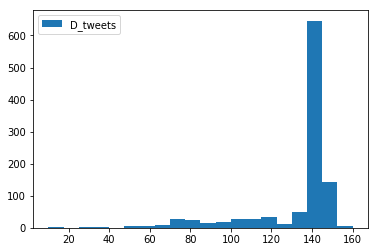

In [4]:
#check the length of tweets in both train and test
length_tweet = tweets['text'].str.len()


plt.hist(length_tweet, bins=20, label="D_tweets")
#plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [4]:
#combi = train.append(test, ignore_index=True)

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [7]:
# remove twitter handles (@user)
tweets['tidy_tweet'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")

In [8]:
# remove special characters, numbers, punctuations
tweets['tidy_tweet'] = tweets['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [9]:
#remove short words
tweets['tidy_tweet'] = tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [10]:
tweets.head()

,_id,sentiment,political,text,tidy_tweet
0,5dc88572678e6d23f770655d,1,0,@AfMusk NDGT is 100% right. I have three heroe...,NDGT right have three heroes Elon Musk Greta T...
1,5dcca71ff372816fadd094df,0,1,@bradleymueller @greta Are you Bob Mueller's s...,Mueller This going blow just like that
2,5dcabb3edd8a420f9f1d568f,1,0,@Dangamipissed @sarahmquinlan @RobGeorge Sarah...,Sarah surprise when learns there were million ...
3,5dcca71df372816fadd094de,0,0,@greta More theatrics! Cry me a river! LoL not...,More theatrics river watching
4,5dcca752f372816fadd094ee,0,0,@greta She must be a Jn 3:3 Christian to be ab...,must Christian able live with jerk hold prayer...


In [24]:
#tokenisation
tokenized_tweet = tweets['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [ndgt, right, have, three, hero, elon, musk, g...
1           [mueller, thi, go, blow, just, like, that]
2    [sarah, surpris, when, learn, there, were, mil...
3                       [more, theatric, river, watch]
4    [must, christian, abl, live, with, jerk, hold,...
Name: tidy_tweet, dtype: object

In [12]:
#stemming
#from nltk.stem.porter import *
#stemmer = PorterStemmer()

#tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
#tokenized_tweet.head()

0    [ndgt, right, have, three, hero, elon, musk, g...
1           [mueller, thi, go, blow, just, like, that]
2    [sarah, surpris, when, learn, there, were, mil...
3                       [more, theatric, river, watch]
4    [must, christian, abl, live, with, jerk, hold,...
Name: tidy_tweet, dtype: object

In [25]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets['tidy_tweet'] = tokenized_tweet

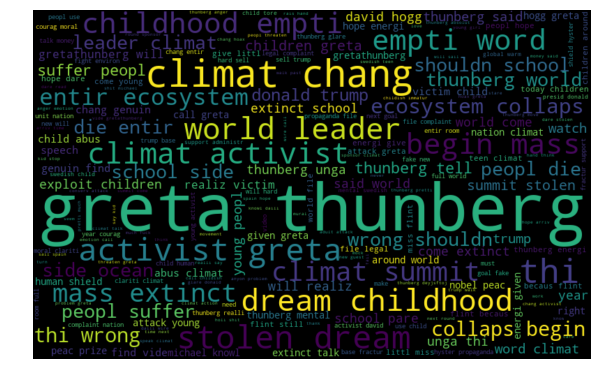

In [27]:
#most common words used
all_words = ' '.join([text for text in tweets['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

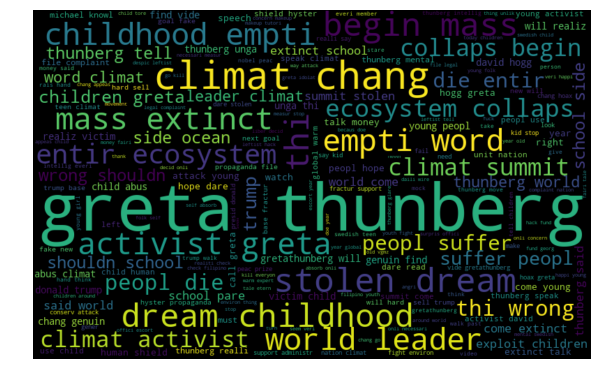

In [28]:
#words negative
negative_words =' '.join([text for text in tweets['tidy_tweet'][tweets['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

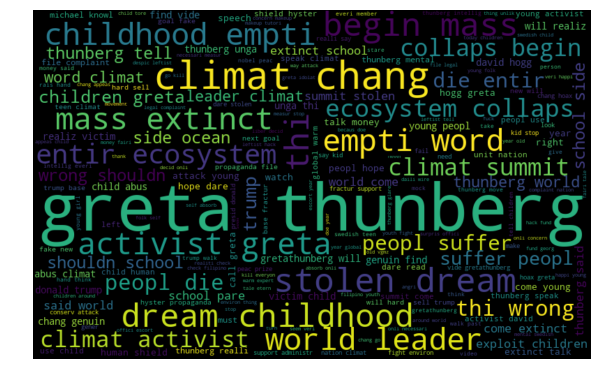

In [29]:
#words positive
positive_words = ' '.join([text for text in tweets['tidy_tweet'][tweets['sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

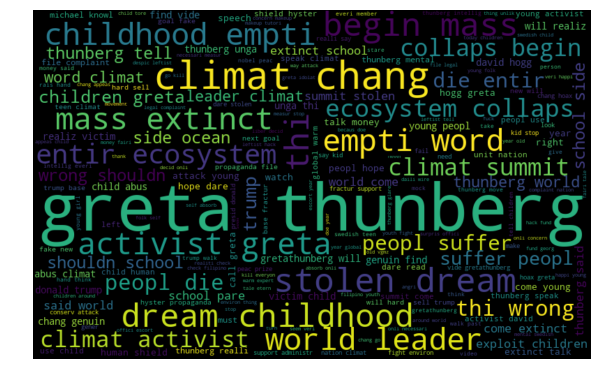

In [30]:
#word politics
political_words =' '.join([text for text in tweets['tidy_tweet'][tweets['political'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [31]:
# collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [32]:
# extracting hashtags for negative sentiment

HT_negative = hashtag_extract(tweets['tidy_tweet'][tweets['sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_positive = hashtag_extract(tweets['tidy_tweet'][tweets['sentiment'] == 1])

# unnesting list
HT_negative = sum(HT_negative,[])
HT_positive = sum(HT_positive,[])

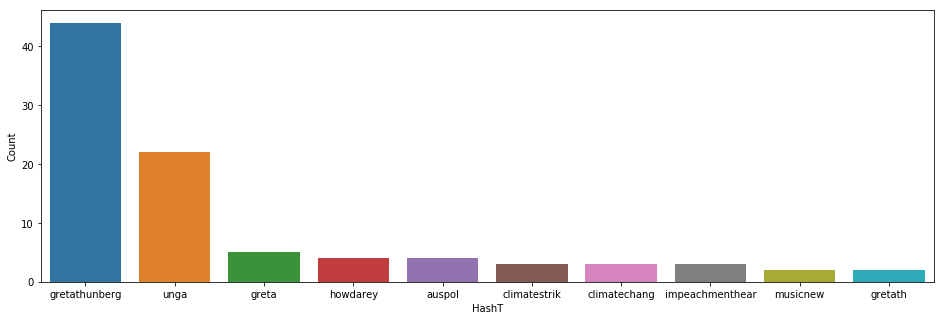

In [33]:
# hashtag with negative sentiment

a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'HashT': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "HashT", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

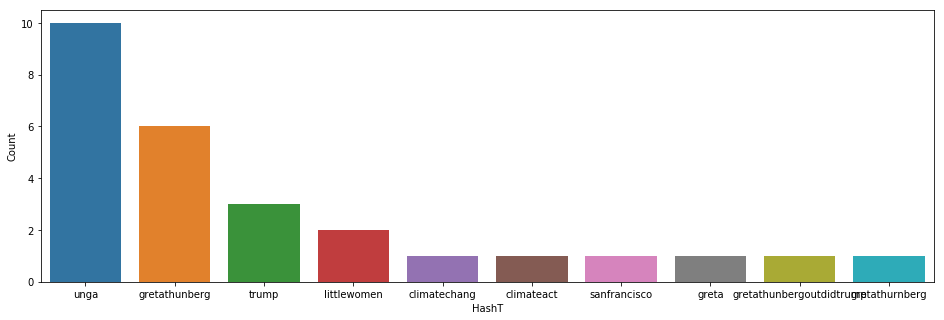

In [34]:
# hashtag with positive sentiment
b = nltk.FreqDist(HT_positive)
e = pd.DataFrame({'HashT': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "HashT", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(tweets['tidy_tweet'])
bow.shape

(1057, 818)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(tweets['tidy_tweet'])
tfidf.shape

(1057, 818)

In [38]:
#word embeddings
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
tokenized_tweet = tweets['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(tweets['tidy_tweet']), epochs=20)

(161274, 244220)

In [39]:
#Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out
#the most similar words from the corpus.
model_w2v.wv.most_similar(positive="environment")

[('down', 0.8861715793609619),
 ('#gretathurnberg', 0.8352531790733337),
 ('emmi', 0.8196776509284973),
 ('kaepernick', 0.8127998113632202),
 ('colin', 0.8097082376480103),
 ('barack', 0.8050733804702759),
 ('compani', 0.801870584487915),
 ('movement', 0.8018303513526917),
 ('popular', 0.7965990304946899),
 ('doesn', 0.796061635017395)]

In [40]:
model_w2v.wv.most_similar(positive="greta")

[('thunberg', 0.8296650648117065),
 ('http', 0.5873562693595886),
 ('peopl', 0.5468536615371704),
 ('somewhat', 0.5457393527030945),
 ('#gretath', 0.5353177785873413),
 ('inspir', 0.5338847637176514),
 ('green', 0.5308952331542969),
 ('come', 0.527890682220459),
 ('rfcr', 0.524370551109314),
 ('challeng', 0.5231998562812805)]

In [41]:
model_w2v['global']

array([ 4.62538227e-02, -5.57738841e-02, -2.66676128e-01, -3.69493701e-02,
        6.16020262e-02, -9.17203575e-02, -6.16010666e-01,  1.58105180e-01,
       -1.80099159e-02, -1.34477741e-03, -1.90336749e-01, -1.69105813e-01,
       -4.55208361e-01, -2.41606906e-01,  2.03509614e-01,  5.24944216e-02,
        7.01798201e-02,  1.91775709e-01,  5.82816064e-01,  2.11827904e-02,
        1.39390439e-01,  1.82031363e-01, -3.53611678e-01, -3.20006944e-02,
        2.53639340e-01, -9.73534435e-02,  3.33100170e-01, -4.19892855e-02,
        4.89704877e-01, -1.51763320e-01,  4.06694598e-02,  6.01644665e-02,
        1.19728401e-01,  3.61765213e-02, -3.59602690e-01, -1.52733460e-01,
       -1.14997901e-01, -1.62084140e-02, -5.83091602e-02,  9.46677253e-02,
       -1.90067545e-01, -5.41602038e-02, -2.84501672e-01, -1.59405842e-01,
        6.00646250e-02, -1.40207559e-01,  8.03331137e-02, -1.04702517e-01,
        4.50976938e-01, -3.29991058e-02,  2.51439214e-01, -1.19894883e-02,
        1.25370901e-02, -

In [42]:
len(model_w2v['global']) #The length of the vector is 200

200

In [44]:
#preparing vectors for each tweet
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [45]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(1057, 200)

In [46]:
# Doc2vec embedding
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [47]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [48]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [49]:
labeled_tweets[:6]

[LabeledSentence(words=['ndgt', 'right', 'have', 'three', 'hero', 'elon', 'musk', 'greta', 'thunberg', 'neil', 'degrass', 'tyson'], tags=['tweet_0']),
 LabeledSentence(words=['mueller', 'thi', 'go', 'blow', 'just', 'like', 'that'], tags=['tweet_1']),
 LabeledSentence(words=['sarah', 'surpris', 'when', 'learn', 'there', 'were', 'million', 'greta', 'http', 'hrjk', 'mprmw'], tags=['tweet_2']),
 LabeledSentence(words=['more', 'theatric', 'river', 'watch'], tags=['tweet_3']),
 LabeledSentence(words=['must', 'christian', 'abl', 'live', 'with', 'jerk', 'hold', 'prayer', 'http', 'klakgoanfd'], tags=['tweet_4']),
 LabeledSentence(words=['seem', 'like', 'cool', 'ladi', 'seem', 'like', 'hang', 'around', 'though', 'busi'], tags=['tweet_5'])]

In [50]:
#train doc2vec model
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

C:\Users\sumat\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████████████████████████████████████████████████████████████████████| 1057/1057 [00:00<00:00, 345063.77it/s]


In [51]:
model_d2v.train(labeled_tweets, total_examples= len(tweets['tidy_tweet']), epochs=15)

In [53]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tweets)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(1057, 200)

# Model Building
We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

Logistic Regression
Support Vector Machine
RandomForest
XGBoost

In [56]:
##logistic regression
# building model using bag of words
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [57]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, xtrain['sentiment'],  
                                                          random_state=42, 
                                                          test_size=0.3)

NameError: name 'xtrain' is not defined

In [103]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

NameError: name 'xtrain_bow' is not defined

In [ ]:
#model to predict on test data
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [75]:
#building model using TD-IDF features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[Ytrain.index]
xvalid_tfidf = train_tfidf[Yvalid.index]

NameError: name 'Ytrain' is not defined

In [76]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

NameError: name 'xtrain_tfidf' is not defined

In [77]:
#doc2vect features
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

NameError: name 'ytrain' is not defined

In [84]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'xvalid_d2v' is not defined

In [85]:
# Support vector machines SVM
from sklearn import svm


In [95]:
#bag of words features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_bow' is not defined

In [89]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svc_bow.csv', index=False)

NameError: name 'svc' is not defined

In [ ]:
#Td-IDF features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

In [90]:
#word2vec features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_w2v' is not defined

In [96]:
#doc2vec features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_d2v' is not defined

In [97]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [98]:
#bag of words
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

NameError: name 'xtrain_bow' is not defined

In [99]:
#bag of words
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

NameError: name 'rf' is not defined

In [ ]:
#TF-IDF
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

In [ ]:
#word2vec 
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

In [ ]:
#doc2vec
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)